Code and ideas from these links

https://towardsdatascience.com/sentiment-analysis-with-text-mining-13dd2b33de27

https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

https://towardsdatascience.com/sentiment-analysis-with-text-mining-13dd2b33de27

Read reviews from files

In [390]:
import pandas as pd

files = ['reviews_kotsovolos_tv.csv',
        'reviews_kotsovolos_fridges.csv',
        'reviews_kotsovolos_search_fridge.csv',
        'reviews_kotsovolos_search_laptop.csv',
        'reviews_kotsovolos_machine.csv',
        'reviews_kotsovolos_kinito.csv',
        'reviews_kotsovolos_aksesouar.csv',
        'reviews_kotsovolos_washers.csv',
        'reviews_kotsovolos_camera.csv']

df_from_each_file = (pd.read_csv(f'./data/{file}') for file in files)
reviews = pd.concat(df_from_each_file, ignore_index=True)

reviews.head()

,stars,text
0,5,Την έχω λίγο καιρό αλλά είμαι πολύ ευχαριστημ...
1,5,ΜΕ ΔΥΟ ΛΕΞΕΙΣ ΠΟΛΥ ΚΑΛΗ
2,5,Άριστο προϊόν τέλεια εικόνα και ήχος! Πάρα πο...
3,5,ΕΚΑΝΑ ΜΙΑ ΠΟΛΥ ΚΑΛΗ ΑΓΟΡΑ! ΤΗΝ ΠΡΟΤΕΙΝΩ...
4,5,Vlepis kathara Kai oreo xroma exei polla


In [391]:
reviews['positive']=reviews.apply(lambda row: 1 if row['stars']>3 else 0, axis=1)

In [392]:
reviews.query('positive==0')['positive'].count(),reviews.query('positive==1')['positive'].count(),(reviews.query('positive==0')['positive'].count()/reviews.query('positive==1')['positive'].count())

(397, 3055, 0.12995090016366612)

In [393]:
# Balance classes by taking all negative reviews and double positive reviews
negative_reviews_count = reviews.query('positive==0')['positive'].count()
#reviews_balanced = reviews
reviews_balanced = reviews.sort_values(by=['positive']).head(negative_reviews_count * 3)
#reviews_balanced = reviews.sort_values(by=['positive']).head(500)

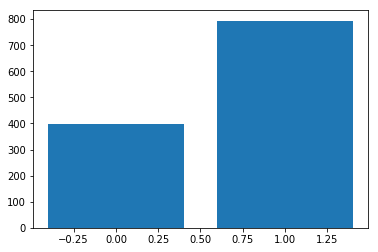

In [394]:
from matplotlib import pyplot as plt
plt.bar([0,1],[reviews_balanced.query('positive==0')['positive'].count(),reviews_balanced.query('positive==1')['positive'].count()])
plt.show()

In [395]:
#Shuffle reviews
reviews_balanced = reviews_balanced.sample(frac=1).reset_index(drop=True)
reviews_balanced.query('positive==0').head()

,stars,text,positive
0,2,Είναι ακριβό γι'αυτά που προσφέρει. Η ανάλυση...,0
6,1,η οθονη κανει γραμμες και δεν φαινεται τιποτα...,0
7,1,"Από την πρώτη μέρα έδειξε τις διαθέσεις της, ...",0
8,3,ΚΑΝΕΙ ΠΟΛΥ ΘΟΡΥΒΟ! ΚΑΛΗ ΣΧΕΣΗ ΠΟΙΟΤΗΤΑΣ - ΤΙΜΗΣ,0
10,1,ΕΙΝΑΙ Η ΧΕΙΡΟΤΕΡΗ ΦΩΤΟΓΡΦΙΚΗ ΜΗΧΑΝΗ ΠΟΥ ΥΠΑΡΧ...,0


In [396]:
reviews_texts = reviews_balanced['text'].tolist()
reviews_sentiment = reviews_balanced['positive'].tolist()

In [397]:
reviews_texts[:10], reviews_sentiment[:10]

([" Είναι ακριβό γι'αυτά που προσφέρει. Η ανάλυση της οθόνης είναι αποδεκτή, η μπαταρία, η ram και η rom είναι καλές, η αφή είναι απαράδεκτη. Επίσης είναι πολύ ευαίσθητο σε χτυπήματα γιατί τα υλικά κατασκευής του είναι χαμηλής ποιότητας. Η τιμή του θα έπρεπε να είναι το πολύ 80 ευρώ γι'αυτά που προσφέρει. ",
  ' Το πλυντήριο εξαιρετικό, η καθυστέρηση παράδοσης και η εξυπηρέτηση του καταστήματος απαράδεκτη. Παραγγελία 4/3, διαθεσιμότητα 11/4, παράδοση 18/4! ',
  ' Άριστα ',
  ' Poly kalo plyntirio. Diatirei th freskada. Plenei poly kala. ',
  ' Ime evxaristimeni poli. 😊😊😊😊 ',
  ' Για τα χρήματα του πολύ καλό.... ',
  ' η οθονη κανει γραμμες και δεν φαινεται τιποτα  οτι πιο χαλια ',
  ' Από την πρώτη μέρα έδειξε τις διαθέσεις της, έκλεινε κι άνοιγε μόνη της, κολούσε το τηλεκοντρόλ, δεν συνδεόταν στο ιντερνετ. Ήρθε τεχνικός και την πήρε την 4η μέρα. ',
  ' ΚΑΝΕΙ ΠΟΛΥ ΘΟΡΥΒΟ! ΚΑΛΗ ΣΧΕΣΗ ΠΟΙΟΤΗΤΑΣ - ΤΙΜΗΣ ',
  ' Πολύ καλό,περνάς αρκετές ώρες μαζί του, αρκετή ποικιλία παιχνιδιών vr. '],
 [0,

In [398]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_DIGITS = re.compile("\d")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [line.replace('διαβάστε περισσότερα','').replace('διαβάστε λιγότερα','') for line in reviews]
    reviews = [REPLACE_DIGITS.sub("",line) for line in reviews]
    return reviews

In [399]:
reviews_texts_clean = preprocess_reviews(reviews_texts)
reviews_texts_clean[:10]

[' είναι ακριβό γιαυτά που προσφέρει η ανάλυση της οθόνης είναι αποδεκτή η μπαταρία η ram και η rom είναι καλές η αφή είναι απαράδεκτη επίσης είναι πολύ ευαίσθητο σε χτυπήματα γιατί τα υλικά κατασκευής του είναι χαμηλής ποιότητας η τιμή του θα έπρεπε να είναι το πολύ  ευρώ γιαυτά που προσφέρει ',
 ' το πλυντήριο εξαιρετικό η καθυστέρηση παράδοσης και η εξυπηρέτηση του καταστήματος απαράδεκτη παραγγελία / διαθεσιμότητα / παράδοση / ',
 ' άριστα ',
 ' poly kalo plyntirio diatirei th freskada plenei poly kala ',
 ' ime evxaristimeni poli 😊😊😊😊 ',
 ' για τα χρήματα του πολύ καλό ',
 ' η οθονη κανει γραμμες και δεν φαινεται τιποτα  οτι πιο χαλια ',
 ' από την πρώτη μέρα έδειξε τις διαθέσεις της έκλεινε κι άνοιγε μόνη της κολούσε το τηλεκοντρόλ δεν συνδεόταν στο ιντερνετ ήρθε τεχνικός και την πήρε την η μέρα ',
 ' κανει πολυ θορυβο καλη σχεση ποιοτητας - τιμης ',
 ' πολύ καλόπερνάς αρκετές ώρες μαζί του αρκετή ποικιλία παιχνιδιών vr ']

In [400]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, y_train, y_test = train_test_split(reviews_texts_clean, reviews_sentiment, test_size=0.20)
len(reviews_train), len(reviews_test)

(952, 239)

In [406]:
from sklearn.feature_extraction.text import CountVectorizer

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#binary : boolean, default=False
#If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.
cv = CountVectorizer(binary=True, stop_words=['ο','το','την','τη','η','οι','και','για','να','τα','της','που','σε',
                                             'στο','στην','του','θα','με','οτι','απο','μου','ειναι','τις','τον',
                                             'στα','μια','ενα','στη','ειμαι','αλλα'],
                    strip_accents ='unicode')
cv.fit(reviews_train)


X_train = cv.transform(reviews_train)
X_test = cv.transform(reviews_test)

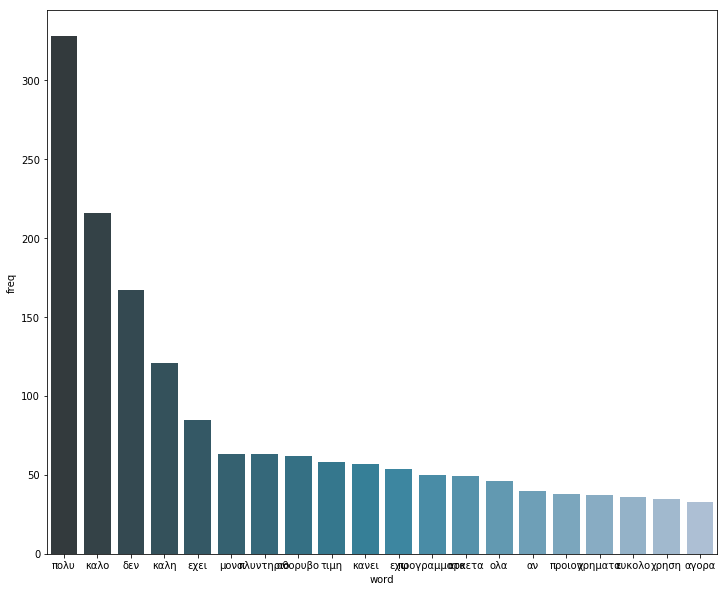

In [407]:
# Word frequencies
import numpy as np
import collections
import seaborn as sns
word_freq = dict(zip(cv.get_feature_names(), np.asarray(X_train.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [408]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#C: Inverse of regularization strength; must be a positive float. 
#Like in support vector machines, smaller values specify stronger regularization.

for c in [0.01, 0.05, 0.25, 0.5, 1, 5]:
    for solver in ['lbfgs', 'liblinear', 'sag']:
        lr = LogisticRegression(C=c, solver=solver, class_weight='balanced')
        lr.fit(X_train, y_train)
        print ("Accuracy on train and test for C=%s and solver=%s: %s" 
               % (c, solver, accuracy_score(y_train, lr.predict(X_train))), accuracy_score(y_test, lr.predict(X_test)))

Accuracy on train and test for C=0.01 and solver=lbfgs: 0.7762605042016807 0.7322175732217573
Accuracy on train and test for C=0.01 and solver=liblinear: 0.7909663865546218 0.7322175732217573
Accuracy on train and test for C=0.01 and solver=sag: 0.7783613445378151 0.7322175732217573
Accuracy on train and test for C=0.05 and solver=lbfgs: 0.8466386554621849 0.7573221757322176
Accuracy on train and test for C=0.05 and solver=liblinear: 0.8466386554621849 0.7573221757322176
Accuracy on train and test for C=0.05 and solver=sag: 0.8466386554621849 0.7573221757322176
Accuracy on train and test for C=0.25 and solver=lbfgs: 0.9054621848739496 0.803347280334728
Accuracy on train and test for C=0.25 and solver=liblinear: 0.9054621848739496 0.803347280334728
Accuracy on train and test for C=0.25 and solver=sag: 0.9054621848739496 0.803347280334728
Accuracy on train and test for C=0.5 and solver=lbfgs: 0.9569327731092437 0.8326359832635983
Accuracy on train and test for C=0.5 and solver=liblinear:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [409]:
best_C = 0.5
best_solver = 'lbfgs'

lr = LogisticRegression(C=best_C, solver=best_solver, class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [410]:
print ("Accuracy on test set: %s" 
           % (accuracy_score(y_test, lr.predict(X_test))))

Accuracy on test set: 0.8326359832635983


In [411]:
to_pred = ['Πολύ καλή εξυπηρέτηση', 
           'Μεγάλη καθυστέρηση', 
           'Χάλια!', 
           'Δεν μου άρεσε', 
           'Πάρα πολύ καλό!', 
           'Αρκετά καλό', 
           'Είμαι πολύ ευχαριστημένος', 
           'Δεν είμαι ευχαριστημένος',
           'Παραπλανητική η διαφήμιση',
           'Εξαιρετικό αποτέλεσμα']
to_pred_clean = preprocess_reviews(to_pred)
X_pred = cv.transform(to_pred_clean)
y_pred = lr.predict(X_pred)
list(zip(to_pred,y_pred))

[('Πολύ καλή εξυπηρέτηση', 1),
 ('Μεγάλη καθυστέρηση', 1),
 ('Χάλια!', 0),
 ('Δεν μου άρεσε', 0),
 ('Πάρα πολύ καλό!', 1),
 ('Αρκετά καλό', 1),
 ('Είμαι πολύ ευχαριστημένος', 1),
 ('Δεν είμαι ευχαριστημένος', 0),
 ('Παραπλανητική η διαφήμιση', 1),
 ('Εξαιρετικό αποτέλεσμα', 1)]

---

Naive Bayes classifier

---

https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

In [220]:
#import nltk
#nltk.download('punkt')

In [261]:
reviews_and_sentiment = zip(reviews_texts_clean, reviews_sentiment)

In [263]:
from nltk.tokenize import word_tokenize # or use some other tokenizer
# Get unique words in all reviews
vocab = set(word.lower() for review in reviews_texts_clean for word in word_tokenize(review))
len(vocab)

2254

In [264]:
#This line creates a list and each element of the list is a tuple: (dictionary, sentiment). The dictionary has all
# the words and true if this word exists in the current review
# https://stackoverflow.com/questions/20827741/nltk-naivebayesclassifier-training-for-sentiment-analysis
t = [({word: (word in word_tokenize(x[0])) for word in vocab}, x[1]) for x in reviews_and_sentiment]

In [265]:
reviews_texts_clean[0],t[0]

(' έχουμε πάρει πολλά μοντέλα αυτό είναι το χειρότερο παρόλο που είναι πολύ hi tech μετά από  εβδομάδες χάλασε ξαφνικά και ο κωτσόβολος μας έστειλε στο servis όπου μας ενημέρωσαν ότι το ανταλλακτικό θα έρθει απ την γαλλία και θα την έχουμε σε  εβδομάδες πέρασαν πάνω από  μήνες και μας είπαν ότι δεν ξέρουν πότε θα έρθει το ανταλλακτικό μεγάλη απογοήτευση απ τον κωτσόβολο και την εταιρία krups ',
 ({'δοκιμή': False,
   'θεληση': False,
   'ανεξιχνίαστες': False,
   'συσκευή': False,
   'κρασαρι': False,
   'μοτερ': False,
   'γνήσιος': False,
   'εμφάνιση': False,
   'αξίζει': False,
   'προσθέτει': False,
   'άργησε': False,
   'μονο': False,
   'όμορφο': False,
   'υπενθυμίσω': False,
   'χάλασε': True,
   'pro': False,
   'προσωπικο': False,
   'mixani': False,
   'aρχικα': False,
   'θολες': False,
   'ατομα': False,
   'συγκεκριμένη': False,
   'προσφορά': False,
   'πάντως': False,
   'smart': False,
   'μπορούσε': False,
   'έρθει': True,
   'δυσκολεύται': False,
   'εγω': False,


In [266]:
len(t)

424

In [267]:
#Split to train and test
offset = int(len(t)*0.2)
train_set, test_set = t[offset:], t[:offset]
len(train_set), len(test_set)

(340, 84)

In [268]:
# Train Naive Bayes classifier
import nltk
classifier = nltk.NaiveBayesClassifier.train(train_set)
classifier.show_most_informative_features()

Most Informative Features
                       ο = True                0 : 1      =      7.7 : 1.0
                    πάρα = True                1 : 0      =      5.6 : 1.0
                     for = True                1 : 0      =      5.6 : 1.0
                   value = True                1 : 0      =      5.6 : 1.0
                  πρέπει = True                0 : 1      =      5.1 : 1.0
                μπαταρία = True                0 : 1      =      5.1 : 1.0
                    μήνα = True                0 : 1      =      4.5 : 1.0
                 σχετικά = True                0 : 1      =      4.5 : 1.0
                    καλη = True                1 : 0      =      4.2 : 1.0
                    ψύξη = True                1 : 0      =      4.1 : 1.0


In [269]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.6428571428571429


In [276]:
#test_sentence = "Αρκετά καλό"
test_sentence = "Πολύ κακό"
featurized_test_sentence = {i:(i in word_tokenize(test_sentence.lower())) for i in vocab}
classifier.classify(featurized_test_sentence)

1